In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

import copy

In [2]:
import pandas as pd


df = pd.read_excel('MusicBTI.xlsx', engine = "openpyxl")

name_list = df['Name'].values.tolist()
value1_list = df['Value1'].values.tolist()
value2_list = df['Value2'].values.tolist()
value3_list = df['Value3'].values.tolist()
value4_list = df['Value4'].values.tolist()
value5_list = df['Value5'].values.tolist()
value6_list = df['Value6'].values.tolist()
value7_list = df['Value7'].values.tolist()
value8_list = df['Value8'].values.tolist()
value9_list = df['Value9'].values.tolist()
value10_list = df['Value10'].values.tolist()
value11_list = df['Value11'].values.tolist()
value12_list = df['Value12'].values.tolist()

def gather():
    global value1_list
    global value2_list
    global value3_list
    global value4_list
    global value5_list
    global value6_list
    global value7_list
    global value8_list
    global value9_list
    global value10_list
    global value11_list
    global value12_list
    
    mid_list = [value1_list, value2_list, value3_list, value4_list, value5_list, value6_list, value7_list, value8_list, value9_list, value10_list, value11_list, value12_list]

    value_list = []
    
    print(len(value1_list))
    for lst_index in range(len(value1_list)):
        mid2_list = []
        for value_index in range(12):
            mid2_list.append(mid_list[value_index][lst_index])
            
        value_list.append(mid2_list)
        
        
    return value_list

# setC_demo = gather()
# print(setC_demo)

In [3]:
def array_to_list_2(ar):
    # NumPy 배열을 이차원 리스트로 변환하는 함수
    # 각 요소의 형식을 유지하면서 변환
    list_result = ar.tolist()
    list_result = [[float(f) for f in inner] for inner in list_result]
    return list_result

In [4]:
def array_to_list(arr):
    # 주어진 배열을 리스트로 변환하여 반환
    return arr.flatten().tolist()

In [5]:
from openai import OpenAI


def return_number(lyrics):
    client = OpenAI()
    
    avg_list = [0,0,0,0,0,0,0,0,0,0,0,0]
    
    for n in range(5):
        completion = client.chat.completions.create(
          model="gpt-3.5-turbo",
          messages=[
            {"role": "system", "content": "You are a helpful assistant. Follow this format: '즐거움/재미: 숫자1', '짜증/불쾌: 숫자2', et cetera. "},
            {"role": "user", "content": f'''즐거움/재미, 짜증/불쾌, 불안/걱정, 반항/분노, 몽환, 관능, 활력, 기쁨, 평안, 슬픔/우울, 두려움, 승리/들뜸 이 12가지의 감정을 내가 노래 가사를 제시해주면 0부터 10까지의 수치로 나타내줘. {lyrics}'''}
          ]
        )

        response_str = str(completion.choices[0].message)
        response_list = response_str.split(': ')

        for i in range(1,13):
            number = response_list[i][0]
            avg_list[i-1] += int(number)
        
    for j in range(12):
        avg_list[j] /= 5

    return avg_list

In [6]:
set_A = np.array(gather())
set_B = copy.deepcopy(name_list)
set_C= []

def new_member_append():
    global set_A
    global set_B
    global set_C
    
    add_new_member_name = input("이름 입력해주세요: ")
    lyrs = input("가사 입력해주세요: ")
    set_B.append(add_new_member_name)
    input_member =  np.array([return_number(lyrs)]).reshape(1, -1)
    
    if set_A.size == 0:  # set_A가 비어 있는 경우
        set_A = input_member
    else:
        set_A = np.append(set_A, input_member, axis=0)  # np.append()로 NumPy 배열에 값을 추가
    
    set_C = array_to_list_2(set_A)

10


In [7]:
new_member_name = None
new_member = None

In [8]:
def new_member_input():
  global new_member_name
  global new_member

  new_member_name = input('검사하고 싶은 사람의 이름 입력하기: ')
  lyrs = input("가사 입력해주세요: ")
  new_member = np.array([return_number(lyrs)]).reshape(1,-1)  # 1부터 10까지의 무작위 숫자로 구성된 새로운 구성원 데이터값 생성
  print(new_member)

In [9]:
def similarity_percentage(a):
  return str(int(round(100*a,0)))+'%'

In [10]:
def new_member_test():
  global set_A
  global set_B
  global set_C

  global new_member_name
  global new_member

  similarities = []
  for member in set_A:
    similarity = cosine_similarity([member], new_member)[0][0]
    similarities.append(similarity)

  # 가장 유사한 구성원 찾기 (코사인 유사도가 가장 큰 구성원)
  most_similar_index = np.argmax(similarities)
  most_similar_member = set_A[most_similar_index]

  # 가장 다른 구성원 찾기 (코사인 유사도가 가장 작은 구성원)
  most_different_index = np.argmin(similarities)
  most_different_member = set_A[most_different_index]

  print(f"{new_member_name}이랑 가장 유사한 구성원은 {set_B[most_similar_index]}이고 유사도는 {similarity_percentage(similarities[most_similar_index])}")
  print(f"{new_member_name}이랑 가장 다른 구성원은 {set_B[most_different_index]}이고 유사도는 {similarity_percentage(similarities[most_different_index])}")

  set_B.append(new_member_name)

  if set_A.size == 0:
    set_A = new_member
  else:
    set_A = np.append(set_A, new_member, axis=0)
    
  set_C = array_to_list_2(set_A)

In [11]:
def show_dodecagon():
  global new_member

  angles = [np.radians(30*n) for n in range(0,12)]  #각도 값
  lengths = array_to_list(new_member)
  print(lengths)  # 길이 값

  # 극 좌표계에 선으로 점 찍기
  plt.figure(figsize=(6, 6))
  ax = plt.subplot(111, projection='polar')  # 극 좌표 설정

  # 각도와 길이 값에 따라 극 좌표에 점 찍기
  for i in range(len(angles) - 1):
    ax.plot([angles[i], angles[i + 1]], [lengths[i], lengths[i + 1]], marker='o', markersize=8)  # 극 좌표에 점 찍기

  # 마지막 점과 첫 번째 점을 이어주기 위한 선분
  ax.plot([angles[-1], angles[0]], [lengths[-1], lengths[0]], marker='o', markersize=8)

  ax.set_title('Emotion Dodecagon')  # 그래프 제목 설정
  ax.grid(True)  # 그리드 표시

  angle_labels = {0: 'Joyful', 30: 'Annoying', 60: 'Anxious', 90: 'Defiant', 120: 'Dreamy', 150: 'Erotic',
                180: 'Triumphant', 210: 'Amusing', 240: 'Calm', 270: 'Depressing', 300: 'Fearful', 330: 'Energizing'}

  angles = np.arange(0, 360, 30)
  ax.set_thetagrids(angles, labels=[angle_labels[angle] for angle in angles])
  ax.set_ylim(0, 10)

  plt.show()

In [25]:
new_member_append()

이름 입력해주세요: 21008 배윤서
가사 입력해주세요: [Letra de "Despacito" ft. Daddy Yankee]  [Intro: Luis Fonsi & Daddy Yankee] Ay, ¡Fonsi! ¡D.Y.! Ooh, oh, no, oh, no, oh ¡Hey, yeah! Dididiri Daddy, go! Sí, sabes que ya llevo un rato mirándote Tengo que bailar contigo hoy (¡D.Y.!) Vi que tu mirada ya estaba llamándome Muéstrame el camino que yo voy  [Verso 1: Luis Fonsi & Daddy Yankee] ¡Oh! Tú, tú eres el imán y yo soy el metal Me voy acercando y voy armando el plan Sólo con pensarlo se acelera el pulso (¡Oh, yeah!) Ya, ya me está gustando más de lo normal Todos mis sentidos van pidiendo más Esto hay que tomarlo sin ningún apuro  [Estribillo: Luis Fonsi & Daddy Yankee] Despacito Quiero respirar tu cuello despacito Deja que te diga cosas al oído Para que te acuerdes si no estás conmigo Despacito Quiero desnudarte a besos despacito Firmar las paredes de tu laberinto Y hacer de tu cuerpo todo un manuscrito (Sube, sube, sube; sube, sube) You might also like There’d Better Be a Mirrorball Arctic Monkeys GOD DI

검사하고 싶은 사람의 이름 입력하기: 노희준
가사 입력해주세요: 난 네 앞에 서 있어 너는 생각에 또 잠겨 있네 함께 있어 더 외로운 나 어쩌다 이렇게 난 네 앞에 서 있어 무슨 말을 할지 모르는 채 떠오르면 또 부서지는 수없이 많은 말 나를 사랑한다 말해도 그 눈빛이 머무는 그곳은 난 헤아릴 수 없이 먼데 너를 사랑한다 말해도 더 이상 반짝이지 않는 두 눈이 말라버린 그 입술이 나를 사랑한다 말해도 금세 침묵으로 흩어지고 네 눈을 바라볼 수 없어 너를 사랑한다 말하던 그 뜨거웠던 마음이 그리워져 그 설렘이 그 떨림이 어쩌면 이미 우린 알고 있나요 그래야만 하는가요 난 네 앞에 서 있어 너는 생각에 또 잠겨 있네 함께 있어 더 외로운 나 어쩌다 이렇게
[[6.4 3.6 5.  2.8 4.8 5.2 4.6 6.6 4.6 4.2 3.8 5.8]]
노희준이랑 가장 유사한 구성원은 21024 전하성이고 유사도는 97%
노희준이랑 가장 다른 구성원은 20510 김현웅이고 유사도는 85%
[6.4, 3.6, 5.0, 2.8, 4.8, 5.2, 4.6, 6.6, 4.6, 4.2, 3.8, 5.8]


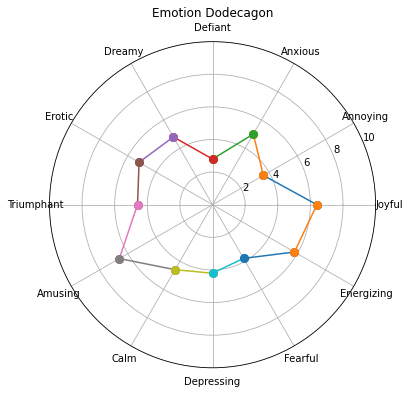

In [30]:
new_member_input()
new_member_test() #
show_dodecagon() #

In [26]:
name_list =[]
value1_list.clear()
value2_list.clear()
value3_list.clear()
value4_list.clear()
value5_list.clear()
value6_list.clear()
value7_list.clear()
value8_list.clear()
value9_list.clear()
value10_list.clear()
value11_list.clear()
value12_list.clear()

In [27]:
#이차원 리스트 set_C를 변환해서 저장
for i in range(len(set_C)):
    value1_list.append(set_C[i][0])
    value2_list.append(set_C[i][1])
    value3_list.append(set_C[i][2])
    value4_list.append(set_C[i][3])
    value5_list.append(set_C[i][4])
    value6_list.append(set_C[i][5])
    value7_list.append(set_C[i][6])
    value8_list.append(set_C[i][7])
    value9_list.append(set_C[i][8])
    value10_list.append(set_C[i][9])
    value11_list.append(set_C[i][10])
    value12_list.append(set_C[i][11])
    print(set_C)

for i in range(len(set_B)):
    name_list.append(set_B[i])

export_df = pd.DataFrame((zip(name_list, value1_list, value2_list, value3_list, value4_list, value5_list, value6_list, value7_list, value8_list, value9_list, value10_list, value11_list, value12_list)), columns = ['Name','Value1', 'Value2', 'Value3', 'Value4', 'Value5', 'Value6', 'Value7', 'Value8', 'Value9', 'Value10', 'Value11', 'Value12'])
export_df.to_excel('MusicBTI.xlsx')

[[7.6, 2.2, 2.6, 1.0, 4.0, 3.2, 6.6, 8.0, 6.0, 2.8, 2.0, 6.2], [7.8, 1.4, 1.6, 0.6, 4.0, 5.2, 6.6, 7.0, 8.2, 3.2, 2.0, 6.8], [4.0, 1.6, 4.4, 1.6, 4.4, 2.4, 3.8, 4.8, 6.2, 6.2, 3.2, 3.8], [4.8, 2.2, 4.6, 1.6, 5.0, 3.6, 4.6, 5.8, 5.2, 4.6, 3.8, 3.4], [6.0, 2.8, 5.4, 2.6, 3.6, 1.6, 4.2, 5.4, 5.2, 7.2, 5.4, 6.4], [8.4, 1.2, 2.2, 1.6, 4.4, 5.6, 7.0, 7.2, 7.0, 3.4, 2.6, 6.8], [7.4, 2.4, 3.6, 2.0, 5.2, 3.8, 6.8, 7.8, 6.4, 6.0, 3.4, 6.8], [6.0, 2.6, 2.8, 3.0, 3.0, 3.0, 5.4, 4.4, 4.0, 2.6, 2.0, 4.0], [2.4, 7.8, 5.6, 8.0, 2.8, 1.2, 2.8, 2.0, 1.2, 6.0, 4.0, 0.4], [2.2, 6.6, 5.8, 5.4, 1.8, 1.4, 2.2, 0.8, 1.8, 7.0, 4.4, 0.8], [6.8, 2.6, 3.8, 1.6, 4.2, 2.4, 5.2, 7.4, 5.8, 5.2, 3.4, 6.6], [8.4, 1.2, 1.0, 0.6, 1.6, 3.0, 5.8, 6.4, 4.2, 3.6, 1.0, 6.0], [8.0, 2.2, 4.4, 2.8, 5.6, 5.2, 7.2, 8.8, 6.6, 5.4, 4.2, 8.2], [5.8, 2.2, 3.6, 6.4, 2.6, 1.2, 7.6, 5.4, 5.0, 6.2, 3.4, 7.6], [6.2, 3.0, 4.8, 6.4, 3.2, 2.8, 6.6, 5.6, 4.0, 3.6, 2.8, 5.2], [7.6, 2.0, 2.4, 2.0, 1.4, 1.6, 4.0, 7.2, 5.0, 6.4, 1.8, 4.4], [7.8, 2

In [25]:
print(set_A, set_B)

[[7.2 2.4 3.  1.8 5.4 4.  6.6 8.4 6.6 6.  3.2 6.6]
 [4.  5.  6.  3.  3.  1.  4.  2.  4.  7.  6.  2. ]
 [7.  2.4 2.2 2.  4.2 3.4 6.6 7.2 5.6 3.2 1.6 7.2]
 [7.2 1.  1.2 0.2 1.8 2.6 5.2 7.  7.  3.4 1.  7. ]
 [4.6 1.4 3.4 0.8 4.4 2.8 1.6 5.8 4.  7.8 3.  4.2]] ['21024 전하성', '20510 김현웅', '20727 전승우', '20722 이선우', '10103 박정원']


In [26]:
print(set_A.tolist())

[[7.2, 2.4, 3.0, 1.8, 5.4, 4.0, 6.6, 8.4, 6.6, 6.0, 3.2, 6.6], [4.0, 5.0, 6.0, 3.0, 3.0, 1.0, 4.0, 2.0, 4.0, 7.0, 6.0, 2.0], [7.0, 2.4, 2.2, 2.0, 4.2, 3.4, 6.6, 7.2, 5.6, 3.2, 1.6, 7.2], [7.2, 1.0, 1.2, 0.2, 1.8, 2.6, 5.2, 7.0, 7.0, 3.4, 1.0, 7.0], [4.6, 1.4, 3.4, 0.8, 4.4, 2.8, 1.6, 5.8, 4.0, 7.8, 3.0, 4.2]]
